In [1]:
import pandas as pd
table = pd.read_csv('jobs_data_cleaned.csv')
table.head()

Job Title             Salary Estimate  \
0  Data Scientist  $77K-$92K (Glassdoor Est.)   
1  Data Scientist  $77K-$92K (Glassdoor Est.)   
2  Data Scientist  $77K-$92K (Glassdoor Est.)   
3  Data Scientist  $77K-$92K (Glassdoor Est.)   
4  Data Scientist  $77K-$92K (Glassdoor Est.)   

                                     Job Description  Rating  \
0  Data Scientist\nAffinity Solutions / Marketing...     2.9   
1  Secure our Nation, Ignite your Future\n\nSumma...     4.1   
2  By clicking the Apply button, I understand tha...     3.7   
3  Join Our Growing Team\nA career with A Place f...     3.0   
4  We are looking for Data Scientists who are int...     3.7   

              Company Name           Location          Headquarters  \
0  Affinity Solutions\n2.9       New York, NY          New York, NY   
1             ManTech\n4.1      Chantilly, VA           Herndon, VA   
2              Takeda\n3.7      Cambridge, MA          OSAKA, Japan   
3     A Place for Mom\n3.0  Overland Park, KS          New York, NY   
4             GovTech\n3.7  San Francisco, CA  Singapore, Singapore   

                      Size  Founded  Type of ownership  ... avg_salary  \
0      51 to 200 employees     1998  Company - Private  ...       84.5   
1  5001 to 10000 employees     1968   Company - Public  ...       84.5   
2         10000+ employees     1781   Company - Public  ...       84.5   
3    501 to 1000 employees     2000  Company - Private  ...       84.5   
4   1001 to 5000 employees     2016         Government  ...       84.5   

        Company_text job_state same state  age  python_yn  r_yn  spark_yn  \
0  Affinity Solution        NY          1   22          1     0         0   
1             ManTec        VA          0   52          0     0         0   
2              Taked        MA          0  239          1     0         1   
3     A Place for Mo        KS          0   20          1     0         0   
4             GovTec        CA          0    4          1     0         0   

  aws_yn excel_yn  
0      0        1  
1      0        0  
2      0        0  
3      1        1  
4      0        1  

[5 rows x 27 columns]

In [2]:
table.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'Company_text',
       'job_state', 'same state', 'age', 'python_yn', 'r_yn', 'spark_yn',
       'aws_yn', 'excel_yn'],
      dtype='object')

### Feature Engineering

In [3]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower() or 'sr.' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [4]:
# Job title simplified
table['job_simp'] = table['Job Title'].apply(title_simplifier)
table['job_simp'].value_counts()

data scientist    627
na                175
data engineer      85
analyst            73
mle                16
director           12
manager            12
Name: job_simp, dtype: int64

In [5]:
# Seniority Level
table['seniority'] = table['Job Title'].apply(seniority)
table['seniority'].value_counts()

na        847
senior    152
jr          1
Name: seniority, dtype: int64

In [6]:
# Fix job_state
table['job_state'] = table['job_state'].apply(lambda x: x.strip())
table['job_state'].value_counts()

CA     218
MA      92
VA      91
NY      78
TX      48
WA      45
IL      41
MD      34
PA      31
CO      27
DC      26
NC      25
OH      21
GA      18
WI      17
MO      17
NJ      17
NAA     15
FL      15
TN      14
AL      12
MI      11
UT       9
MN       9
CT       9
NE       8
OR       6
IN       6
AZ       5
IA       4
RI       4
OK       4
ID       3
KS       3
HI       2
SC       2
MS       2
KY       2
AR       1
ME       1
NM       1
DE       1
NH       1
WV       1
NV       1
ND       1
LA       1
Name: job_state, dtype: int64

In [7]:
# Job Description Length
table['desc_len'] = table['Job Description'].apply(lambda x: len(x))

In [8]:
# Count of competitors
table['num_comp'] = table['Competitors'].apply(lambda x: len(x.strip(',')) if x != '-1' else 0)
table['num_comp']

0      36
1       0
2      24
3      56
4       0
       ..
995     0
996     0
997    11
998     0
999    25
Name: num_comp, Length: 1000, dtype: int64

In [9]:
# hourly wage to annual
table['min_salary'] = table.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis = 1)
table['max_salary'] = table.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis = 1)

In [10]:
table[table['hourly']==1][['hourly', 'min_salary', 'max_salary']]

hourly  min_salary  max_salary
60       1          34          46
61       1          34          46
62       1          34          46
63       1          34          46
64       1          34          46
65       1          34          46
66       1          34          46
67       1          34          46
68       1          34          46
69       1          34          46
70       1          34          46
71       1          34          46
72       1          34          46
73       1          34          46
74       1          34          46
75       1          34          46
76       1          34          46
77       1          34          46
78       1          34          46
79       1          34          46
80       1          34          46
81       1          34          46
82       1          34          46
83       1          34          46
84       1          34          46
85       1          34          46
86       1          34          46
87       1          34          46
88       1          34          46
89       1          34          46

In [11]:
table['Company_text']

0      Affinity Solution
1                 ManTec
2                  Taked
3         A Place for Mo
4                 GovTec
             ...        
995          Shelf Engin
996           Wells Farg
997            Fannie Ma
998    XSELL Technologie
999                NYSTE
Name: Company_text, Length: 1000, dtype: object

In [12]:
table.describe()

Rating      Founded       hourly   min_salary   max_salary  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      3.581300  1650.801000     0.030000    83.550000   121.290000   
std       1.323818   741.158672     0.170673    24.945737    32.864052   
min      -1.000000    -1.000000     0.000000    34.000000    46.000000   
25%       3.400000  1920.750000     0.000000    68.000000   101.000000   
50%       3.800000  1995.000000     0.000000    83.000000   121.000000   
75%       4.300000  2008.000000     0.000000   105.000000   138.000000   
max       5.000000  2019.000000     1.000000   139.000000   229.000000   

        avg_salary   same state          age    python_yn         r_yn  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    101.820000     0.424000    31.525000     0.662000     0.003000   
std      29.383516     0.494438    44.513355     0.473265     0.054717   
min      20.000000     0.000000    -1.000000     0.000000     0.000000   
25%      89.500000     0.000000     6.000000     0.000000     0.000000   
50%      99.500000     0.000000    17.000000     1.000000     0.000000   
75%     121.500000     1.000000    34.000000     1.000000     0.000000   
max     184.000000     1.000000   330.000000     1.000000     1.000000   

          spark_yn       aws_yn     excel_yn      desc_len     num_comp  
count  1000.000000  1000.000000  1000.000000   1000.000000  1000.000000  
mean      0.238000     0.239000     0.411000   3573.130000    10.038000  
std       0.426072     0.426686     0.492261   1802.620357    17.724184  
min       0.000000     0.000000     0.000000    132.000000     0.000000  
25%       0.000000     0.000000     0.000000   2403.750000     0.000000  
50%       0.000000     0.000000     0.000000   3352.500000     0.000000  
75%       0.000000     0.000000     1.000000   4486.000000    21.000000  
max       1.000000     1.000000     1.000000  18555.000000    92.000000

### Univariate Analysis

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
table['Rating'].hist();

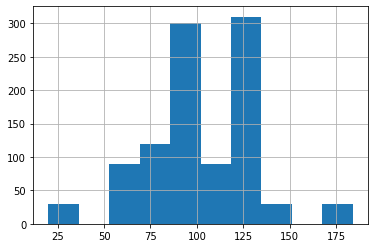

In [14]:
table['avg_salary'].hist();

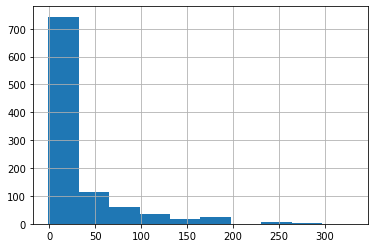

In [15]:
table['age'].hist();

In [16]:
table.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'Company_text',
       'job_state', 'same state', 'age', 'python_yn', 'r_yn', 'spark_yn',
       'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

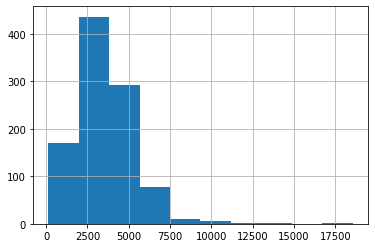

In [17]:
table['desc_len'].hist();

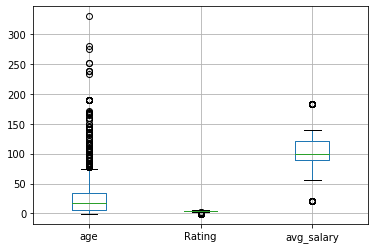

In [18]:
table.boxplot(column = ['age','Rating', 'avg_salary'])

In [19]:
table[['age', 'avg_salary', 'Rating', 'desc_len']].corr()

age  avg_salary    Rating  desc_len
age         1.000000    0.034152  0.082409   0.32537
avg_salary  0.034152    1.000000 -0.037977  -0.01813
Rating      0.082409   -0.037977  1.000000   0.09444
desc_len    0.325370   -0.018130  0.094440   1.00000

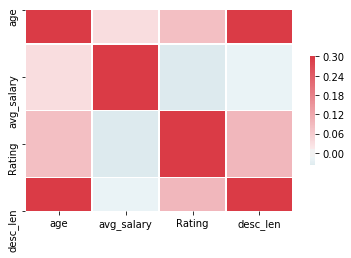

In [20]:
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(table[['age', 'avg_salary', 'Rating', 'desc_len']].corr(), vmax=0.3, cmap=cmap, center=0, square=True, 
           linewidth=0.5, cbar_kws={"shrink":0.5});

In [23]:
df_cat = table[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company_text', 'job_state',
            'same state', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority']]

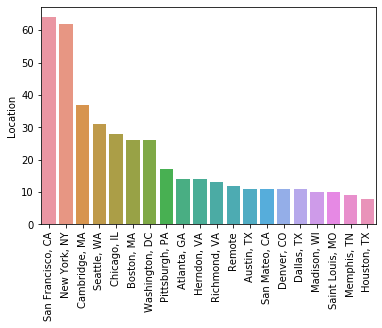

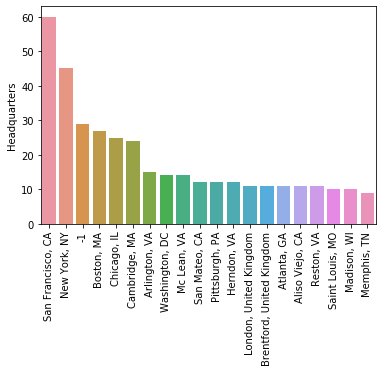

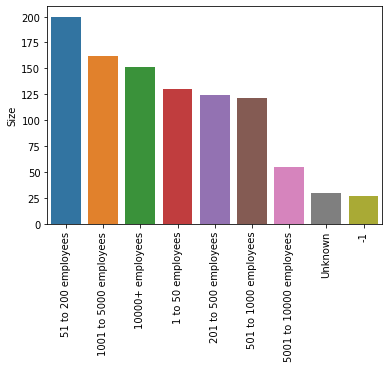

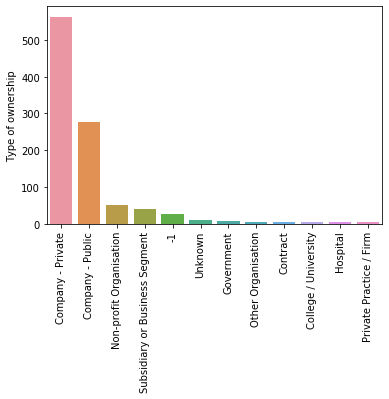

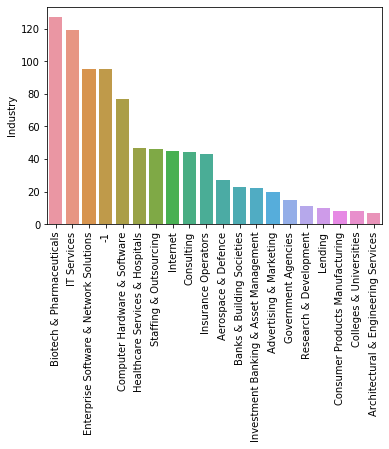

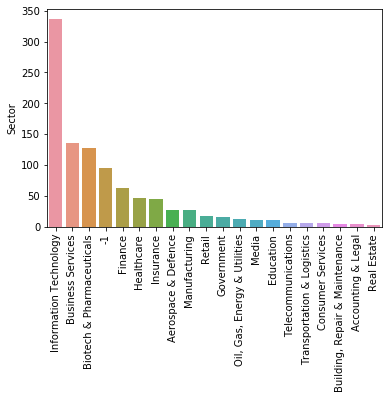

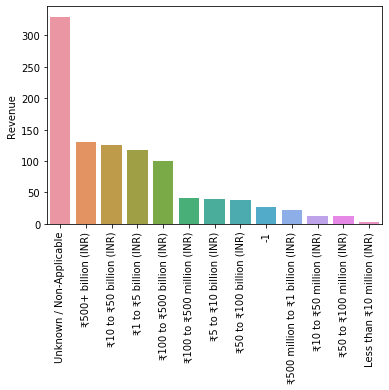

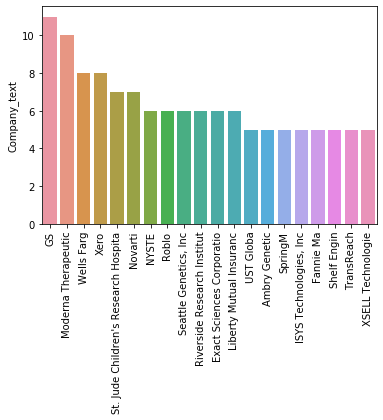

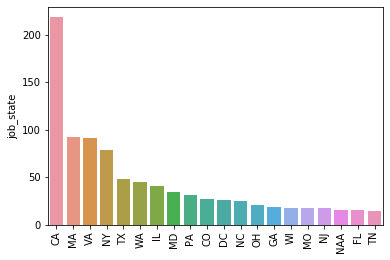

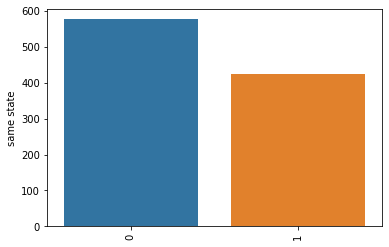

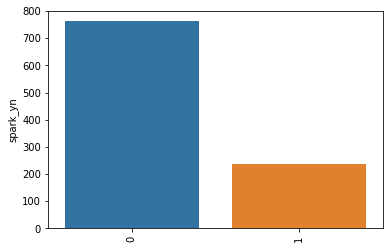

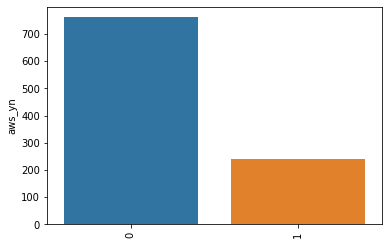

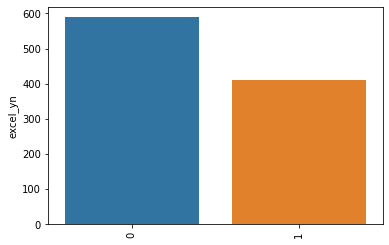

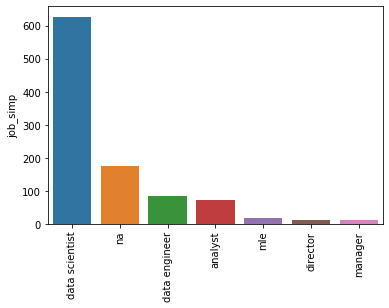

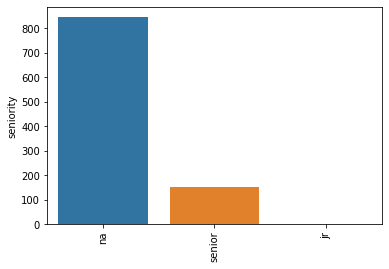

In [25]:
for i in df_cat.columns:
    cat_count = df_cat[i].value_counts()[:20]
    chart = sns.barplot(x=cat_count.index, y=cat_count)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

### Bivariate Analysis

In [26]:
pd.pivot_table(table, index='job_simp', values='avg_salary')

avg_salary
job_simp                  
analyst          99.376712
data engineer    98.823529
data scientist  103.628389
director         97.083333
manager          99.375000
mle             110.906250
na               97.477143

In [28]:
pd.pivot_table(table, index='job_state', values='avg_salary').sort_values('avg_salary', ascending = False)

avg_salary
job_state            
WV         124.000000
NV         124.000000
NM         124.000000
KS         121.833333
MN         118.444444
ID         116.666667
GA         114.027778
NE         112.437500
ND         111.000000
AL         110.833333
PA         110.064516
TX         105.135417
NY         105.115385
CO         104.500000
DC         103.211538
WA         102.811111
AZ         102.400000
CA         102.215596
WI         102.000000
IN         101.750000
OH         101.452381
FL         101.366667
MO         100.941176
HI         100.000000
NAA         99.900000
MA          99.885870
NC          99.680000
VA          99.532967
MI          99.500000
MD          98.397059
IL          98.317073
TN          97.892857
RI          97.625000
NJ          97.411765
KY          96.750000
IA          96.625000
MS          90.750000
OR          90.500000
UT          90.277778
AR          89.500000
OK          84.375000
CT          82.388889
SC          76.500000
NH          68.500000
DE          68.500000
LA          57.000000
ME          20.000000

In [29]:
pd.pivot_table(table[table.job_simp=='data scientist'], index='job_state', values='avg_salary').sort_values('avg_salary', ascending=False)

avg_salary
job_state            
MN         124.416667
WV         124.000000
NM         124.000000
AL         118.150000
NE         112.642857
GA         112.633333
NC         112.000000
MA         111.313953
WI         109.750000
ID         109.750000
WA         109.555556
DC         109.380952
PA         107.236842
TX         107.233333
VA         105.271186
MO         103.000000
FL         102.954545
AZ         102.875000
MD         102.846154
NAA        102.772727
NY         102.548077
MI         101.833333
CO         101.281250
IN         100.333333
HI         100.000000
CA          99.940559
IL          98.362069
KY          96.750000
OH          96.250000
TN          94.562500
OK          94.500000
UT          93.333333
OR          90.200000
NJ          89.750000
AR          89.500000
KS          84.500000
CT          83.250000
RI          80.000000
NH          68.500000
SC          68.500000
DE          68.500000

In [31]:
table.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'Company_text',
       'job_state', 'same state', 'age', 'python_yn', 'r_yn', 'spark_yn',
       'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [37]:
df_pivot = table[['Rating','Industry','Sector','Revenue','hourly','python_yn','r_yn','spark_yn','aws_yn','excel_yn','num_comp','avg_salary']]

In [38]:
pd.pivot_table(df_pivot, index='Revenue', columns='python_yn', values='avg_salary', aggfunc='count')

python_yn                          0    1
Revenue                                  
-1                                 8   19
Less than ₹10 million (INR)        1    2
Unknown / Non-Applicable          84  246
₹1 to ₹5 billion (INR)            38   80
₹10 to ₹50 billion (INR)          58   68
₹10 to ₹50 million (INR)           2   11
₹100 to ₹500 billion (INR)        39   61
₹100 to ₹500 million (INR)        19   22
₹5 to ₹10 billion (INR)           13   27
₹50 to ₹100 billion (INR)         15   23
₹50 to ₹100 million (INR)          1   11
₹500 million to ₹1 billion (INR)  11   11
₹500+ billion (INR)               49   81

In [39]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

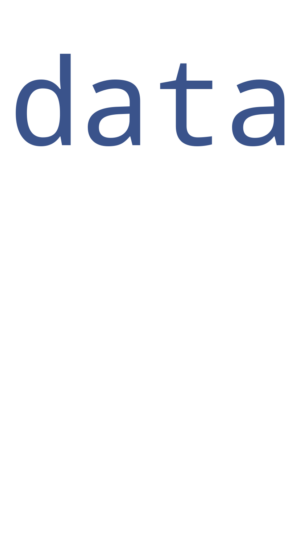

In [43]:
words = " ".join(table['Job Description'])

def punctuation_stop(text):
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
        return filtered
    
words_filtered = punctuation_stop(words)

text = ' '.join([word for word in words_filtered])

wc = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words=2000, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Abhinav
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True